### Student Information
Name: 林頎桓

Student ID: 113065518

GitHub ID: chihuan-lin

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Data Source
The data is contained in `Reddit-stock-sentiment.csv`. It contains posts and comments from various stock-related subreddits. For each post/comment, we have the number of upvotes/downvotes, polarity as well as sentiment etc.

## 2. Data Preparation

Import Reddit data with Pandas and preview the data.

In [1]:
import os
import pandas as pd

DATA_PATH = os.path.join('newdataset', 'Reddit-stock-sentiment.csv')
raw_df = pd.read_csv(DATA_PATH)

raw_df.info()
raw_df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


---

### >>> Exercise 1
In this exercise, please print out the *text* data for the first three samples in the dataset.

In [2]:
# Answer here
for i in range(3):
    print(f"Example {i+1}:")
    print(raw_df.text[i])

Example 1:
Calls on retards
Example 2:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3:
Seeing lots of red in the ticker.


---

## 3. Data Transformation

Transform/filter columns and add `sentiment_label` column to the dataframe (transform sentiment values into labels). The resulting dataframe is `reddit_df`.

In [3]:
sentiment_map = {-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'}
reddit_df = raw_df.copy()
reddit_df['datetime'] = pd.to_datetime(reddit_df['datetime'], errors='coerce') # Convert datetime string to pandas datetime object
reddit_df['text'] = (
    reddit_df['text'].fillna('')
                    .astype(str)
                    .str.replace(r'\s+', ' ', regex=True) # Replace runs of whitespace with a single space
                    .str.strip() # Trim ends
)
reddit_df['sentiment_label'] = reddit_df['sentiment'].map(sentiment_map)
reddit_df = reddit_df[['type', 'datetime', 'subreddit', 'title', 'upvotes', 'text', 'sentiment_label']]

reddit_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             847 non-null    object        
 1   datetime         847 non-null    datetime64[ns]
 2   subreddit        847 non-null    object        
 3   title            847 non-null    object        
 4   upvotes          847 non-null    int64         
 5   text             847 non-null    object        
 6   sentiment_label  847 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 46.4+ KB


---

### >>> Exercise 2
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [4]:
# Answer here
# Sort and query recent posts
recent_posts = (
    reddit_df.sort_values('datetime', ascending=False)
             .loc[:, ['datetime', 'subreddit', 'sentiment_label', 'text']]
             .head(5)
)
recent_posts

,datetime,subreddit,sentiment_label,text
815,2025-04-12 03:23:21,wallstreetbets,positive,You see a glass that's 98% empty. I see a glas...
781,2025-04-12 03:19:53,wallstreetbets,negative,So you only see white chicks at Target even th...
519,2025-04-12 03:19:30,wallstreetbets,neutral,Found the killjoy.
611,2025-04-12 03:15:02,wallstreetbets,positive,I've been in them. They're nothing special.
646,2025-04-12 03:15:01,wallstreetbets,neutral,You building a city skyline?


---

### >>> Exercise 3
Try to fetch records belonging to the ```wallstreetbets``` subreddit, and query every 10th record. Only show the first 5 records.

In [5]:
# Answer here
reddit_df[reddit_df['subreddit'] == 'wallstreetbets'][::10][0:5]

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,negative
40,comment,2025-04-11 22:00:36,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,10,These China AI factory memes are pretty good. ...,positive
96,comment,2025-04-12 02:05:07,wallstreetbets,Someone post the hotline please.,1,200k loss in a month.. haha,positive
183,comment,2025-04-11 22:45:45,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,13,My resume isn't even read by companies anymore...,neutral
227,comment,2025-04-11 20:25:56,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,9,#Ban Bet Lost /u/Local-Wall-4359 made a bet th...,positive


---

## 4. Data Mining using Pandas

### 4.1 Missing Values
Using the helper function to check missing columns.

In [6]:
import helpers.data_mining_helpers as dmh

missing_by_column = reddit_df.isnull().apply(lambda col: dmh.check_missing_values(col))
missing_by_column

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0


---

### >>> Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [7]:
# Answer here
reddit_df.isnull().apply(lambda row: dmh.check_missing_values(row), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

---

Now I’ll deliberately insert bogus data to test the helper function. I’ll add a `Series` into the DataFrame to simulate corruption.

In [8]:
dummy_series = pd.Series(["dummy_record", "wallstreetbets"], index=["text", "subreddit"])
dummy_series

text           dummy_record
subreddit    wallstreetbets
dtype: object

In [9]:
dummy_series.to_frame().T

,text,subreddit
0,dummy_record,wallstreetbets


In [10]:
result_with_series = pd.concat([reddit_df, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series) # Check if the records was commited into result

848

Now let's try the helper function and see if it works.

In [11]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,0,1,1,0,1


So now we can see our data has missing values. I'll remove the records with missing values.

In [12]:
reddit_df.dropna(inplace=True)
reddit_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,subreddit,title,upvotes,text,sentiment_label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0


In [13]:
len(reddit_df)

847

---

### >>> Exercise 5
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [14]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [15]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [16]:
# Answer here
# In NA_dict, missing_example has different types of data:
# np.nan (A), missing key -> NaN (B), string (C, D, F), and None (E).
# When we call isnull(), row C, D and F returns False because 'NaN', 'None', and '' are strings (notice the single quotation marks!).

---

### 4.2 Dealing with Duplicate Data
Now let's deal with duplicated data. Checking duplicated records:

In [17]:
print(f'Duplicate rows: {reddit_df.duplicated().sum()}')


Duplicate rows: 0


Checking duplicated text in records instead of an entire record:

In [18]:
print(f'Duplicate text rows: {reddit_df.duplicated("text", keep=False).sum()}')
reddit_df.loc[reddit_df.duplicated('text', keep=False), 'text'] # See inside the duplicated texts

Duplicate text rows: 34


34     So they went from saying redditors are bad for...
42     So they went from saying redditors are bad for...
70                 Updated Daily by EOD [Daily Shorts]()
105                 [World Markets (stockbuyvest.com)]()
159     Gappers for today [Gappers (stockbuyvest.com)]()
160    how does the futures market look today SPY, Eu...
179    This data is from FINRA ATS - Updated Weekly []()
192    Summarized with Highlights, updated weekly be ...
284    &#x200B; [Cryptocurrency Prices, Charts, Daily...
349                Updated Daily by EOD [Daily Shorts]()
352    how does the futures market look today SPY, Eu...
387    This data is from FINRA ATS - Updated Weekly []()
409    Upgrades, Downgrades [Stock Analyst Recommenda...
421    Stocks that are trending up today [Popping (st...
432    &#x200B; [Cryptocurrency Prices, Charts, Daily...
438    Summarized with Highlights, updated weekly be ...
462    This data is from FINRA ATS - Updated Weekly []()
473    how does the futures mar

As we can see, there are duplicated texts! Most of these rows look like advertisements or spam (which is noise), so we can drop those rows.

In [19]:
reddit_df.drop_duplicates('text', keep=False, inplace=True)
len(reddit_df)

813

## 5. Data Preprocessing

### 5.1 Sampling
I'll sample some data in `reddit_df`.

In [20]:
reddit_df_sample = reddit_df.sample(n=400, random_state=42) # Pick 400 samples
len(reddit_df_sample)

400

In [21]:
reddit_df_sample[0:4] # First 4 samples

,type,datetime,subreddit,title,upvotes,text,sentiment_label
255,comment,2025-04-11 13:57:46,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,1,Mf signs his texts. Good grief,negative
613,comment,2025-04-11 14:16:14,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,1,404 Brain not found. Hm... I get the feeling t...,negative
235,comment,2025-04-11 10:59:08,StockMarket,🚨China responds to Trump’s 145% tariff with an...,12,6969% tariffs or riot.,neutral
300,comment,2022-04-23 20:11:55,stockstobuytoday,Technical Analysis Thread.,1,[/](/),neutral


---

### >>> Exercise 6
Notice any changes from the `reddit_df` dataframe to the `reddit_df_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `reddit_df`. Feel free to query and look more closely at the dataframe for these changes.

In [22]:
# Answer here
# reddit_df_sample's indexes are in random order compared to reddit_df which is organized. Also reddit_df_sample (100 rows) is a subset of reddit_df (813 rows).
# It's as if we put all observations in reddit_df into a lottery machine, and draw 100 observations out of the machine.

---

I'll visualize the distribution of sentiments in both the original data and the sample. I'll plot of the data and compare below.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

For the original data:

sentiment_label
positive    315
neutral     303
negative    195
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment_label'>

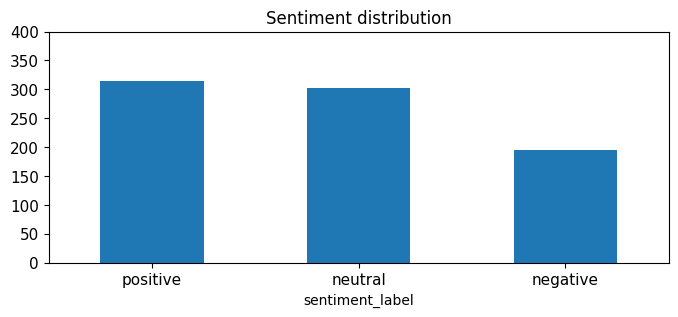

In [24]:
print(reddit_df.sentiment_label.value_counts())

# Plot barchart for reddit_df
reddit_df.sentiment_label.value_counts().plot(kind = 'bar',
                                            title = 'Sentiment distribution',
                                            ylim = [0, 400],        
                                            rot = 0, fontsize = 11, figsize = (8,3))

For the sampled data:

sentiment_label
positive    157
neutral     137
negative    106
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution (Sample)'}, xlabel='sentiment_label'>

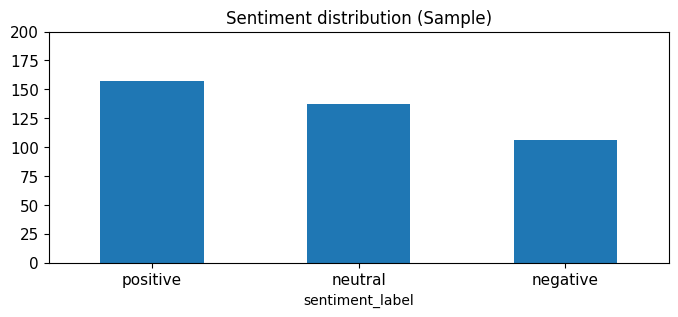

In [25]:
print(reddit_df_sample.sentiment_label.value_counts())

# Plot barchart for reddit_df
reddit_df_sample.sentiment_label.value_counts().plot(kind = 'bar',
                                                    title = 'Sentiment distribution (Sample)',
                                                    ylim = [0, 200],        
                                                    rot = 0, fontsize = 11, figsize = (8,3))

---

### >>> Exercise 7
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Sentiment distribution (Sample)'}, xlabel='sentiment_label'>

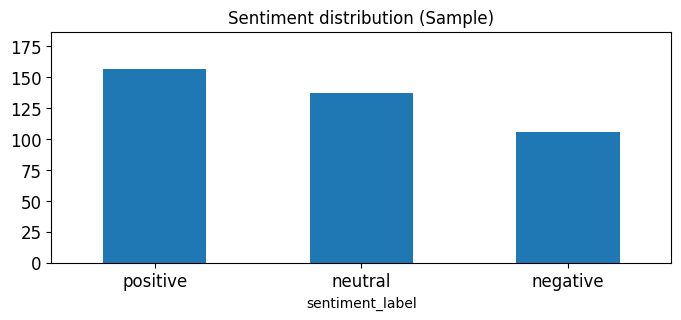

In [26]:
# Answer here
reddit_df_sample.sentiment_label.value_counts().plot(kind = 'bar',
                                                    title = 'Sentiment distribution (Sample)',
                                                    ylim = [0, reddit_df_sample.sentiment_label.value_counts().max() + 30], 
                                                    rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

<Axes: title={'center': 'Sentiment distribution'}>

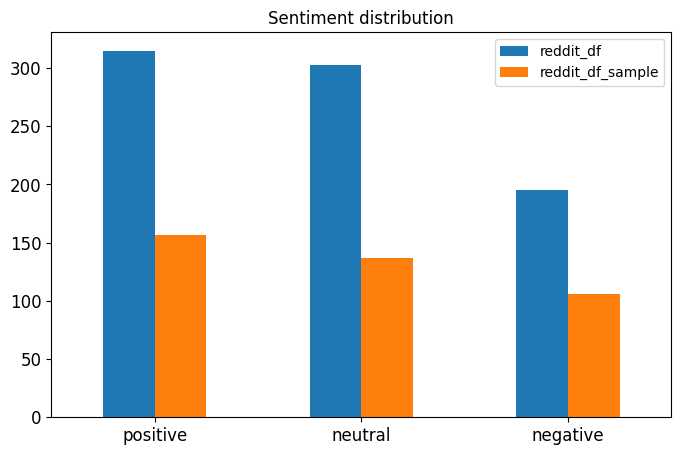

In [27]:
# Answer here
counts = pd.concat([reddit_df.sentiment_label.value_counts(), reddit_df_sample.sentiment_label.value_counts()], axis=1)
counts.columns = ['reddit_df', 'reddit_df_sample']

counts.plot(kind='bar',
            title='Sentiment distribution',
            xlabel='',
            rot=0,
            fontsize=12,
            figsize=(8,5))

---

### 5.2 Feature Creation
With NLTK, I'm going to create some features from the `text` field.

In [28]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

reddit_df['unigrams'] = reddit_df['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Banana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Banana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Here I'll preview some created unigrams:

In [29]:
reddit_df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [30]:
list(reddit_df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature Subset Selection
I'll generate a document-term matrix from the original dataset.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
reddit_df_counts = count_vect.fit_transform(reddit_df.text) # Learn the vocabulary and return document-term matrix
print(reddit_df_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal I'm going to use the default analyzer provided by `CountVectorizer`.

In [32]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# Tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### >>> Exercise 9
Let's analyze the first record of our `reddit_df` dataframe with the new analyzer we have just built.

In [33]:
# Answer here
analyze(reddit_df.text[0])

['calls', 'on', 'retards']

---

Let's look closer at the term-document matrix we built above.

In [34]:
reddit_df_counts.shape

(813, 4313)

In [35]:
count_vect.get_feature_names_out()[0:10] # 10 feature names from the vectorizer

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [36]:
# we convert from sparse array to normal array
reddit_df_counts[10:15, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [37]:
count_vect.get_feature_names_out()[29]

'15'

We can see that the record with index=13 contains a `1` at the 30th position (index=29), which from our feature names we can deduce that this article contains exactly one `15` term. I'll verify this by looking into the record's text field.

In [38]:
reddit_df.text[13]

'I’ve been doing pretty good with this, but it’s heavy on fees. Looking for a similar risk return profile but any ideas on how to do it with less fees? I don’t want to sell calls by myself. Qdte 35% Upro 25% Tltw 15% Ispy 10% Brkb 10% Msci/Nvda 5%'

Indeed, there is exactly one `15` term in the text (in `Tltw 15%`).

---

### >>> Exercise 10
We said that the `1` at record with index=13 represents the `15` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [39]:
# Answer here
mask = reddit_df_counts[13, 0:100].indices
print(mask) # The corresponding indices are 8, 29, and 77, which mark the indices of the 2, 1, 1 we saw in the array
# We are interested in the term at index 77
print(count_vect.get_feature_names_out()[77]) # The answer: '25'

[ 8 77 29]
25


---

Let us look at a heat map of our term-document matrix.

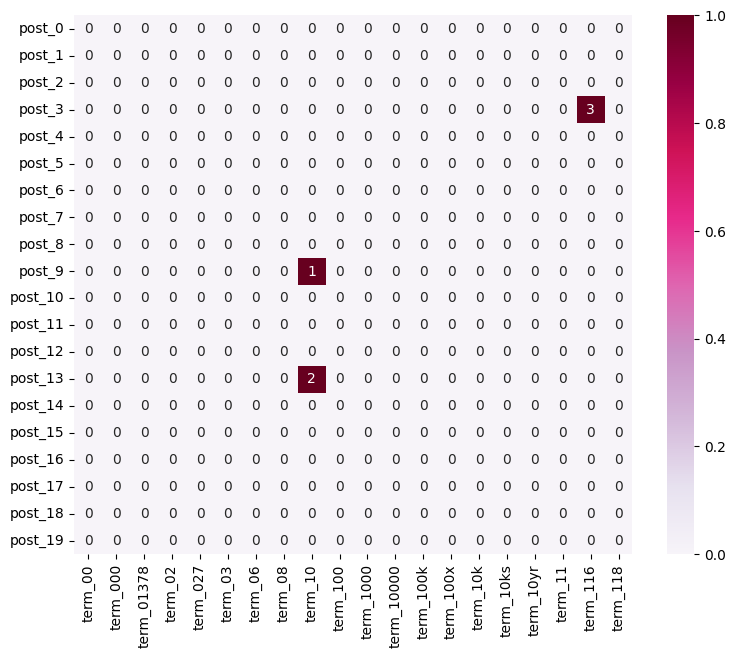

In [40]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["post_"+ str(i) for i in list(reddit_df.index)[0:20]]
plot_z = reddit_df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### >>> Exercise 11
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

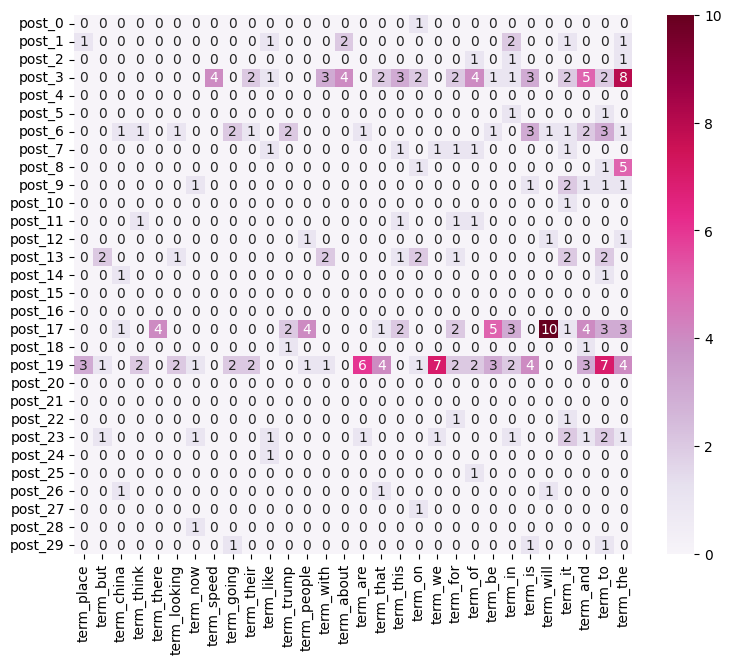

In [41]:
# Answer here
# For the first 30 posts, I can pick the top 30 terms most frequent in those posts and display them
import seaborn as sns

sub = reddit_df_counts[0:30, :]
voc_count = sub.sum(axis=0).A1
top_idx = np.argpartition(voc_count, -30)[-30:]

new_plot_x = [f"term_{i}" for i in count_vect.get_feature_names_out()[top_idx]]
new_plot_y = [f"post_{i}" for i in list(reddit_df.index)[0:30]]
new_plot_z = sub[:, top_idx].toarray()

df_todraw = pd.DataFrame(new_plot_z, columns = new_plot_x, index = new_plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=new_plot_z.max(), annot=True)

---

### 5.4 Attribute Transformation / Aggregation
Here I'm going to generate a simple distribution of the words found in all the entire set of articles. Let's get into it.

In [42]:
term_frequencies = reddit_df_counts.sum(axis=0).A1
term_frequencies[0]

np.int64(4)

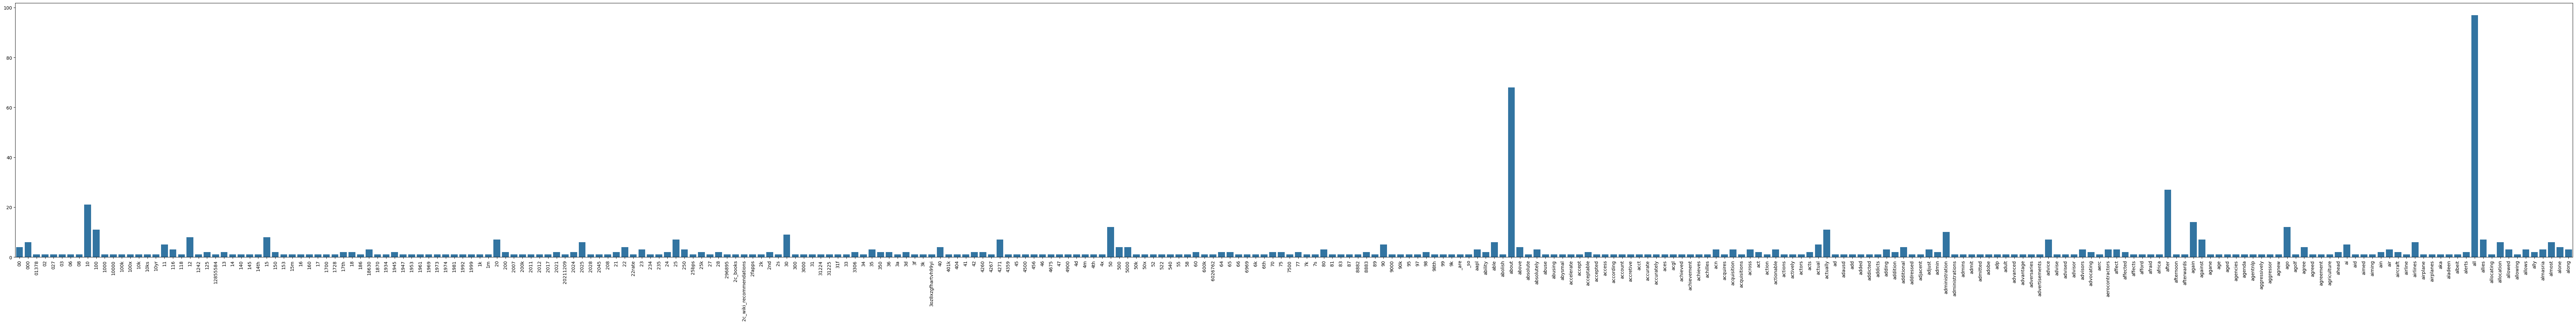

In [43]:
fig, ax = plt.subplots(figsize=(100, 10))
sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
ax.xaxis.set_tick_params(rotation=90)
plt.show()

---

### >>> Exercise 12
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [44]:
# Answer here
import plotly.express as px
sub = reddit_df_counts[:, :300]
voc_count = sub.sum(axis=0).A1
x_labels = [i for i in count_vect.get_feature_names_out()[:300]]
fig = px.bar(x=x_labels, y=voc_count, labels={'x': 'Term', 'y': 'Total Count'})
fig.show()

---

### >>> Exercise 13
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [45]:
# Answer here
# Reduce the number of terms to 30
sub = reddit_df_counts[:, :30]
voc_count = sub.sum(axis=0).A1
x_labels = [i for i in count_vect.get_feature_names_out()[:30]]
fig = px.bar(x=x_labels, y=voc_count, labels={'x': 'Term', 'y': 'Total Count'})
fig.show()

---

### >>> Exercise 14
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [46]:
# Answer here
voc_count_full = reddit_df_counts.sum(axis=0).A1
df_todraw = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "count": voc_count_full
})
df_sorted = df_todraw.sort_values("count", ascending=False, kind="mergesort", ignore_index=True)
fig = px.bar(df_sorted[:300], x='term', y='count') # Display the most frequent 300 terms
fig.show()

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution.

In [47]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

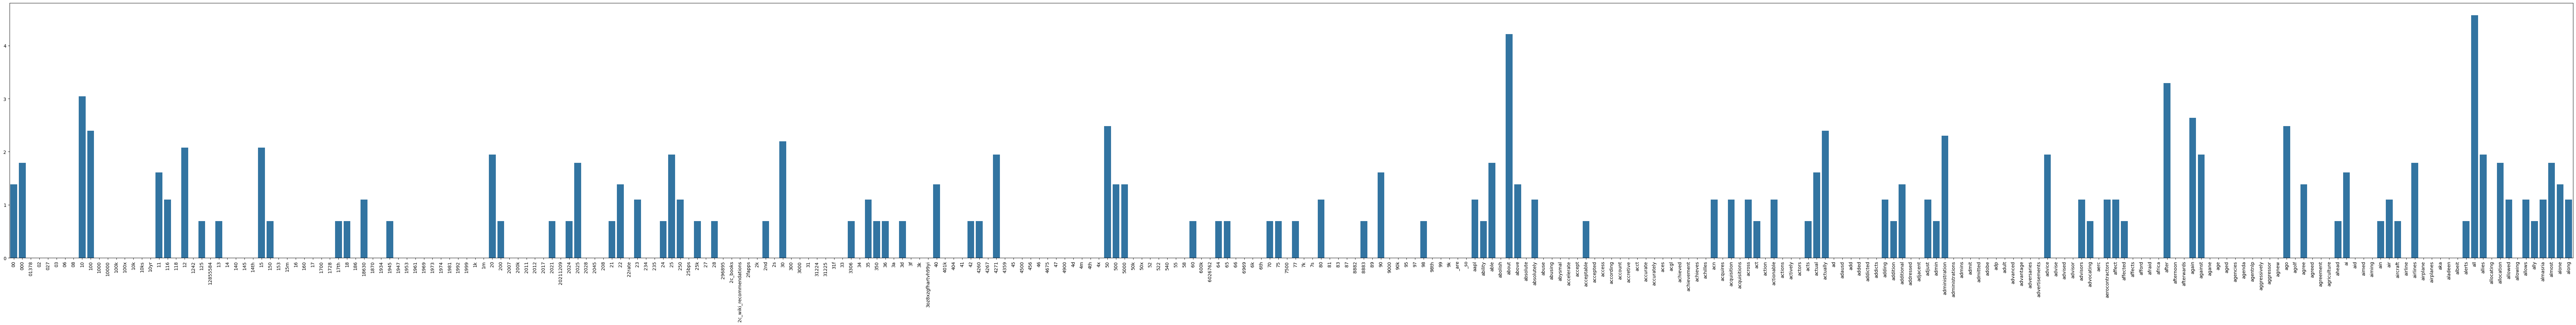

In [48]:
fig, ax = plt.subplots(figsize=(100, 10))
sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies_log[:300])
ax.xaxis.set_tick_params(rotation=90)
plt.show()

---

### >>> Exercise 15
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [49]:
# Answer here
# The distribution after the log transform looks more uniform, and low-frequency terms become visible, which helps us compare the low-frequency terms.
# The order stays the same, but the y axis becomes multiplicative, which is useful when the distribution spans multiple orders of magnitude.
import math
voc_count_full = reddit_df_counts.sum(axis=0).A1
df_todraw = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "count_log": [math.log(i) for i in voc_count_full]
})
df_sorted = df_todraw.sort_values("count_log", ascending=False, kind="mergesort", ignore_index=True)
fig = px.bar(df_sorted[:300], x='term', y='count_log', labels={'count_log': ''}) # Display the most frequent 300 terms
fig.show()

---

### >>> New Data Visualizations

1. Sentiment volume grouped by subreddits. We can see that in all four subreddits, there are more positive posts than negative posts. Particularly, in `r/stockstobuytoday`, there are more neutral posts than positive/negative ones, reflecting the subreddit's neutral/informative nature.

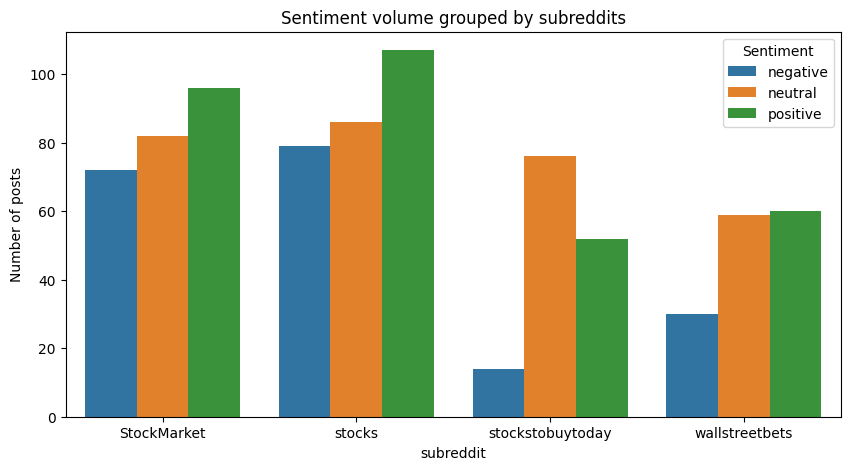

In [50]:
tally = reddit_df.groupby(['subreddit', 'sentiment_label']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=tally, x='subreddit', y='count', hue='sentiment_label')
ax.set_title('Sentiment volume grouped by subreddits')
ax.set_ylabel('Number of posts')
plt.legend(title='Sentiment', loc='upper right')
plt.show()


2. Treemap of top 300 term frequencies. We can see that "the", "to", "and", and "is" combined form ~18% of all tokens. We can also see a long tail of other words, which fits our observations from previous term frequency plots.

In [51]:
voc_count_full = reddit_df_counts.sum(axis=0).A1
df_todraw = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "count": voc_count_full
})
df_sorted = df_todraw.sort_values("count", ascending=False, kind="mergesort", ignore_index=True).head(300)

fig = px.treemap(
    df_sorted, path=[px.Constant("All subreddits"), 'term'], values='count',
    color='count', color_continuous_scale='Blues',
    title='Top 300 term frequencies'
)
fig.update_traces(textinfo='label+value+percent root')
fig.show()

---

# Phase 2

Now, we can mine patterns that can be representative to each subreddit. For that we will need to first modify our document-term matrix to be able to work for each category. We'll do the following:

In [52]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = reddit_df['subreddit'].unique()
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = reddit_df[reddit_df['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    term_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(term_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

After filtering for categories and some processing, we now have term frequencies for each subreddit. The problem is terms like "the", "to", "and"... dominate the top terms, while some meaningless terms dominate the bottom terms. We can filter them out to reveal more valuable patterns. We'll filter out the **top 5%** and **bottom 1%** of the terms.

In [53]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
category_number = 0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
being     1
100       1
1000      1
10k       1
12        1
17th      1
186       1
should    1
1934      1
dtype: int64
Top 5.0% words: 
make         8
she          8
with         8
if           8
go           8
see          8
market       8
about        9
no           9
good         9
puts         9
up           9
what         9
there        9
will        10
now         10
we          10
not         10
target      10
be          10
over        11
all         11
was         11
have        12
are         12
at          14
can         15
but         15
just        15
like        16
so          17
t5_2th52    18
emote       18
img         18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64

For category StockMarket we filter the following

,10,18630,1981,1m,20,200k,2012,2021,208,234,...,wutang,xi,year,years,yesterday,yet,yippee,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

### >>> Exercise 16
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [54]:
# Answer here
# For the top common terms, all categories contain similar terms (like function words: the, and...).
# I calculated the top term overlap, and for the top 100 terms, all categories contain the same 45 words.
# For the bottom terms, each category is very different from each other. The overlap is 0 for the bottom 100 terms.

# Below is the calculation of the overlaps between the top & bottom terms in all categories
def top_bottom_n_terms(category_number, n):
    word_sums = filt_term_document_dfs[categories[category_number]].sum(axis=0)
    sorted_words = word_sums.sort_values()
    return (sorted_words.tail(n).index, sorted_words.head(n).index) # n terms from the top & bottom
    
n = 100 # Number of terms to be included
top = {}
bottom = {}
for i in range(3):
    top[i], bottom[i] = top_bottom_n_terms(i, n)
top_overlap = set(top[0]) & set(top[1]) & set(top[2])
bottom_overlap = set(bottom[0]) & set(bottom[1]) & set(bottom[2])
print(f"Top {n} term overlap count: {len(top_overlap)}")
print(f"Bottom {n} term overlap count: {len(bottom_overlap)}")

Top 100 term overlap count: 45
Bottom 100 term overlap count: 0


---

Now, we can proceed to use the PAMI library to convert our dataframes into transactional databases to work with.

In [55]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Below is the code to resolve some UTF-8 encoding issues:

In [56]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

Some stats about the converted transactional databases:

Database size (total no of transactions) : 248
Number of items : 1499
Minimum Transaction Size : 1
Average Transaction Size : 10.149193548387096
Maximum Transaction Size : 146
Standard Deviation Transaction Size : 12.392681216618644
Variance in Transaction Sizes : 154.20032323364242
Sparsity : 0.9932293572058792


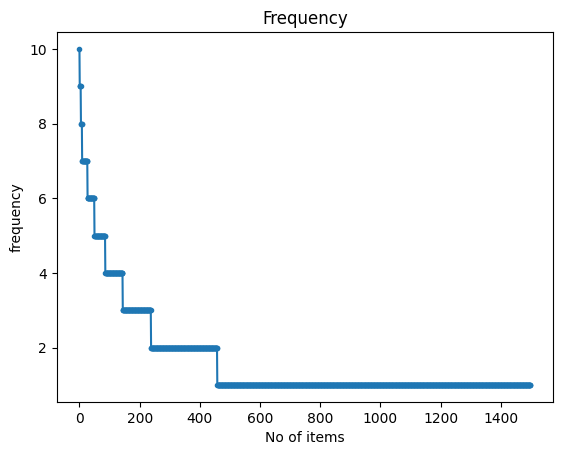

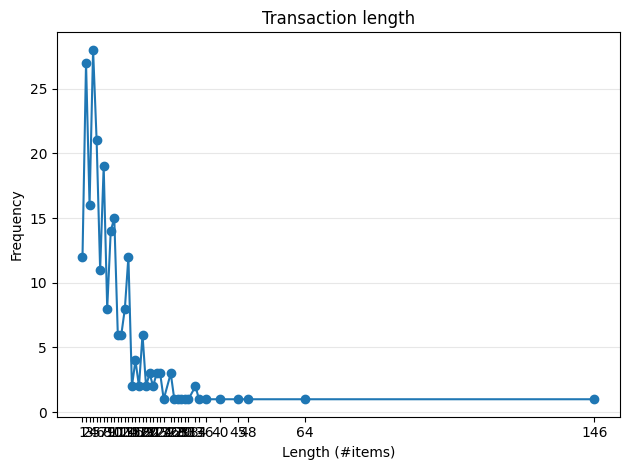

In [57]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 272
Number of items : 2204
Minimum Transaction Size : 1
Average Transaction Size : 14.349264705882353
Maximum Transaction Size : 166
Standard Deviation Transaction Size : 17.083899783488654
Variance in Transaction Sizes : 292.93660462339915
Sparsity : 0.9934894443258248


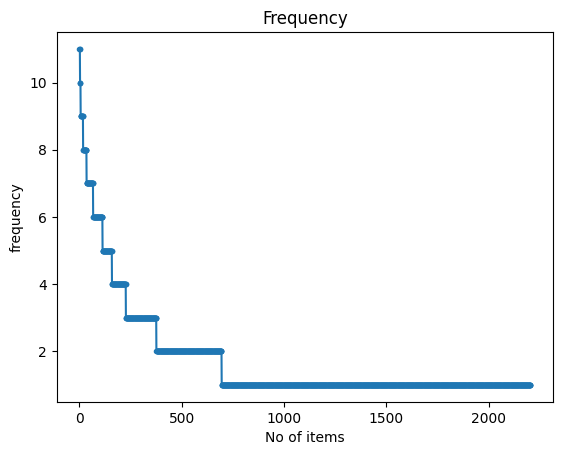

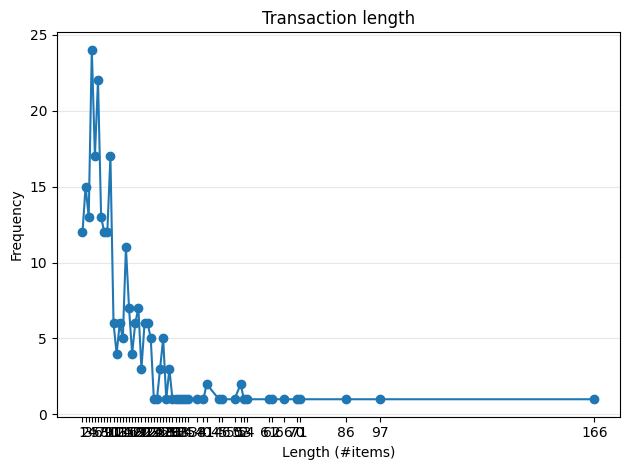

In [58]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 140
Number of items : 1475
Minimum Transaction Size : 1
Average Transaction Size : 15.1
Maximum Transaction Size : 214
Standard Deviation Transaction Size : 27.544327909753036
Variance in Transaction Sizes : 764.1482014388489
Sparsity : 0.9897627118644068


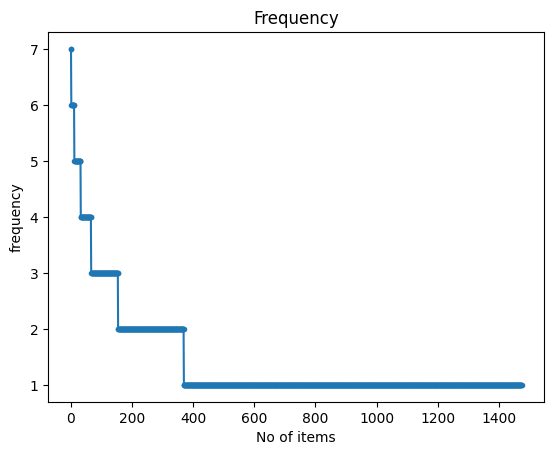

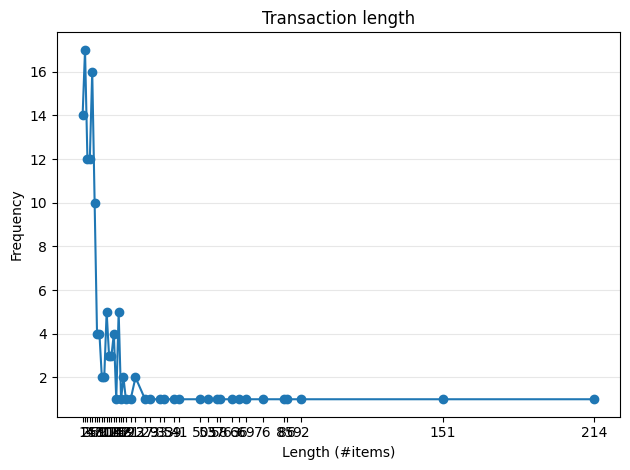

In [59]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 146
Number of items : 915
Minimum Transaction Size : 1
Average Transaction Size : 9.301369863013699
Maximum Transaction Size : 64
Standard Deviation Transaction Size : 9.416809411543717
Variance in Transaction Sizes : 89.28786017949929
Sparsity : 0.9898345684557227


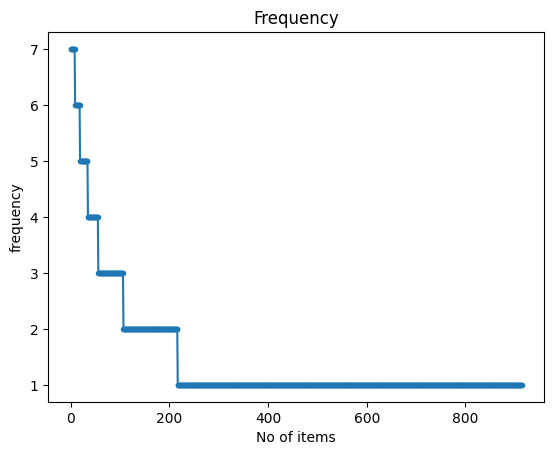

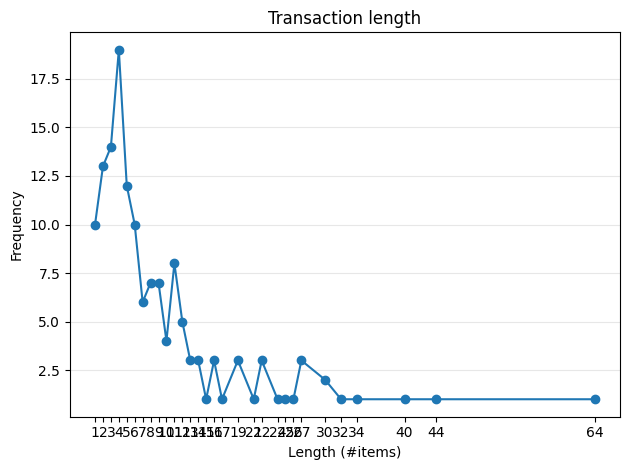

In [60]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

We are going to use the FPGrowth algorithm from PAMI to mine patterns in our transactions. We'll set minimum support to 3 for our reddit data.

In [61]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 3

print("Generating frequent patterns for td_freq_db_StockMarket.csv")
obj1 = alg.FPGrowth(iFile='td_freq_db_StockMarket.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_stockmarket= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockmarket)))
print('Runtime: ' + str(obj1.getRuntime()))
obj1.save('freq_patterns_StockMarket_minSup3.txt')

print("Generating frequent patterns for td_freq_db_stocks.csv")
obj2 = alg.FPGrowth(iFile='td_freq_db_stocks.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_stocks= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stocks)))
print('Runtime: ' + str(obj2.getRuntime()))
obj2.save('freq_patterns_stocks_minSup3.txt')

print("Generating frequent patterns for td_freq_db_stockstobuytoday.csv")
obj3 = alg.FPGrowth(iFile='td_freq_db_stockstobuytoday.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_stockstobuytoday= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_stockstobuytoday)))
print('Runtime: ' + str(obj3.getRuntime()))
obj3.save('freq_patterns_stockstobuytoday_minSup3.txt')

print("Generating frequent patterns for td_freq_db_wallstreetbets.csv")
obj3 = alg.FPGrowth(iFile='td_freq_db_wallstreetbets.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_wallstreetbets= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_wallstreetbets)))
print('Runtime: ' + str(obj3.getRuntime()))
obj3.save('freq_patterns_wallstreetbets_minSup3.txt')

Generating frequent patterns for td_freq_db_StockMarket.csv
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 252
Runtime: 0.0020024776458740234
Generating frequent patterns for td_freq_db_stocks.csv
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 426
Runtime: 0.003999948501586914
Generating frequent patterns for td_freq_db_stockstobuytoday.csv
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 196
Runtime: 0.0010013580322265625
Generating frequent patterns for td_freq_db_wallstreetbets.csv
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 115
Runtime: 0.000997781753540039


In [62]:
frequentPatternsDF_stockmarket

,Patterns,Support
0,dump,3
1,chart,3
2,dumb,3
3,stupid,3
4,joke,3
...,...,...
247,way,9
248,way\tfrom,3
249,want,9
250,than,9


In [63]:
frequentPatternsDF_stocks

,Patterns,Support
0,earnings,3
1,jerome,3
2,next,3
3,personally,3
4,starting,3
...,...,...
421,know,10
422,also,11
423,point,11
424,point\talso,3


In [64]:
frequentPatternsDF_stockstobuytoday

,Patterns,Support
0,inc,3
1,ll,3
2,record,3
3,tldr,3
4,years,3
...,...,...
191,looking\they,3
192,anyone,6
193,anyone\they,3
194,first,7


In [65]:
frequentPatternsDF_wallstreetbets

,Patterns,Support
0,retards,3
1,company,3
2,its,3
3,best,3
4,think,3
...,...,...
110,us,7
111,us\tchina,3
112,re,7
113,still,7


We are going to extract the unique patterns in each category so that we can improve our classification later. We want to discard the common patterns across categories to enhance our classification.

In [66]:
import pandas as pd

# We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_stockmarket, frequentPatternsDF_stocks, frequentPatternsDF_stockstobuytoday, frequentPatternsDF_wallstreetbets]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

         Patterns  Support
95          there       10
94           want        9
347        buying        9
352        reddit        9
334        powell        8
..            ...      ...
10           rich        3
11           data        3
12   dictatorship        3
13     government        3
14          works        3

[509 rows x 2 columns]
Number of patterns discarded: 480


Finally, we'll augment our data with the unique patterns above.

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
reddit_df_tdm = count_vect.fit_transform(reddit_df['text'])
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
reddit_df['tokenized_text'] = reddit_df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=reddit_df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(reddit_df_tdm.toarray(), columns=terms, index=reddit_df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,walmart,goes,terrible,japan,gets,rich,data,dictatorship,government,works
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

### >>> Exercise 17
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'StockMarket' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 50, 100, and 150, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [68]:
# Answer Here
# The FAE Top-K method always returns exactly k patterns and its runtime grows with k.
# They intersect 50/100/150 out of 50/100/150 with FPGrowth(minSup = 3), showing that the whole Top-K lists sit above support >= 3.
# At minSup = 9, all 5 maximal patterns are also frequent (5/5). Same for minSup = 6 and minSup = 3.

from PAMI.frequentPattern.topk import FAE as fae_alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as max_alg
import re

iFile = 'td_freq_db_StockMarket.csv'

# FAE Top-K
topk_ks = [50, 100, 150]
topk_results = {}
topk_runtimes = {}

for k in topk_ks:
    obj_topk = fae_alg.FAE(iFile=iFile, k=k)
    obj_topk.mine()
    df_topk = obj_topk.getPatternsAsDataFrame()
    topk_results[k] = df_topk
    topk_runtimes[k] = obj_topk.getRuntime()
    obj_topk.save(f'topk_fae_StockMarket_k{k}.txt') # Save the patterns
    print(f'FAE Top-K (k={k}) | no. of patterns: {len(df_topk)} | runtime: {topk_runtimes[k]}')

# MaxFPGrowth
max_minsups = [3, 6, 9]
max_results = {}
max_runtimes = {}

for ms in max_minsups:
    obj_max = max_alg.MaxFPGrowth(iFile=iFile, minSup=ms)
    obj_max.mine()
    df_max = obj_max.getPatternsAsDataFrame()
    max_results[ms] = df_max
    max_runtimes[ms] = obj_max.getRuntime()
    obj_max.save(f'maxfp_StockMarket_minSup{ms}.txt') # Save the patterns
    print(f'MaxFPGrowth (minSup={ms}) | no. of patterns: {len(df_max)} | runtime: {max_runtimes[ms]}')

# Functions to canonicalize the patterns for comparisons
def to_items(s):
    return frozenset(re.findall(r'[^,\s\[\]\(\)\{\}]+', str(s)))

def canonize(df, pat_col='Patterns'):
    return set(df[pat_col].map(to_items))

# Compare with earlier FPGrowth (minSup=3) results
if 'frequentPatternsDF_stockmarket' in globals():
    fp_set = canonize(frequentPatternsDF_stockmarket)

    for k, df in topk_results.items():
        fae_set = canonize(df)
        inter = len(fae_set & fp_set)
        print(f'Top-K k={k}: intersects FPGrowth(minSup=3) on {inter} patterns (of {len(df)})')
    for k, df in max_results.items():
        max_set = canonize(df)
        inter = len(max_set & fp_set)
        print(f'MaxFPGrowth(minSup={k}): intersects FPGrowth(minSup=3) on {inter} patterns (of {len(df)})')


 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K (k=50) | no. of patterns: 50 | runtime: 0.0020008087158203125
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K (k=100) | no. of patterns: 100 | runtime: 0.001998424530029297
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K (k=150) | no. of patterns: 150 | runtime: 0.0029969215393066406
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=3) | no. of patterns: 229 | runtime: 0.0029976367950439453
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=6) | no. of patterns: 50 | runtime: 0.0009999275207519531
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth (minSup=9) | no. of patterns: 5 | runtime: 0.0010061264038085938
Top-K k=50: intersects FPGrowth(minSup=3) on 50 patterns (of 50)
Top-K k=100

In [69]:
# FAE Top-K Patterns
topk_results[50] # K = 50

,Patterns,Support
0,there,10
1,from,9
2,way,9
3,want,9
4,than,9
5,because,8
6,tariffs,8
7,well,8
8,then,8
9,guy,7


In [70]:
topk_results[100] # K = 100

,Patterns,Support
0,there,10
1,from,9
2,way,9
3,want,9
4,than,9
...,...,...
95,year,4
96,thought,4
97,work,4
98,economic,4


In [71]:
topk_results[150] # K = 150

,Patterns,Support
0,there,10
1,from,9
2,way,9
3,want,9
4,than,9
...,...,...
145,chart,3
146,dumb,3
147,stupid,3
148,joke,3


In [72]:
# MaxFPGrowth Patterns
max_results[3] # Minimum support = 3

,Patterns,Support
0,bankrupt,3
1,win,3
2,casino,3
3,leader,3
4,stop,3
...,...,...
224,well,8
225,tariffs,8
226,because,8
227,want,9


In [73]:
max_results[6] # Minimum support = 6

,Patterns,Support
0,dollar,6
1,anything,6
2,enough,6
3,nothing,6
4,still,6
5,talking,6
6,allies,6
7,need,6
8,into,6
9,long,6


In [74]:
max_results[9] # Minimum support = 9

,Patterns,Support
0,than,9
1,want,9
2,way,9
3,from,9
4,there,10


---

### 5.5 Dimensionality Reduction
We'll explore PCA, t-SNE, and UMAP techniques for dimensionality reduction, and plot all these methods below.

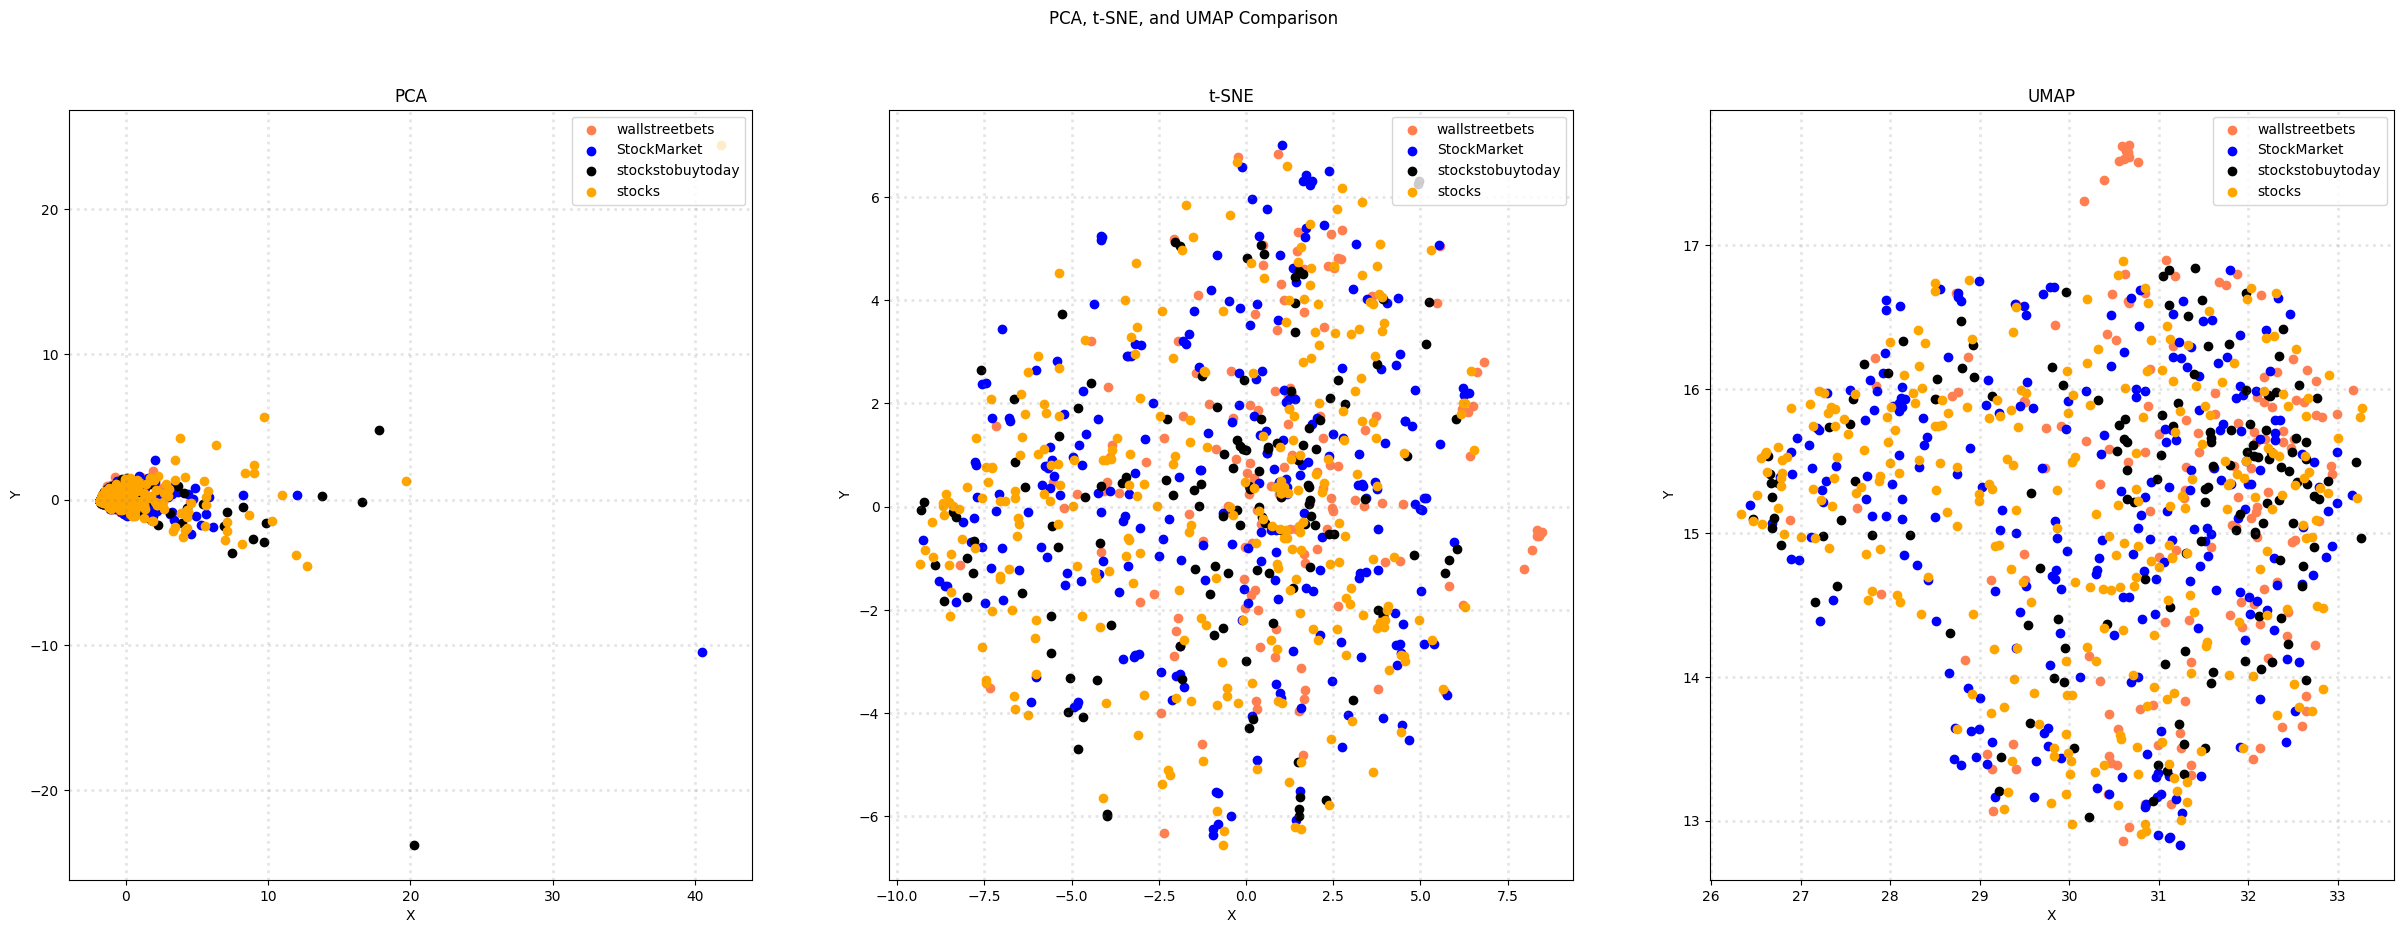

In [75]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
reddit_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
reddit_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
reddit_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Plot the results in subplots
colors = ['coral', 'blue', 'black', 'orange']
categories = reddit_df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, reddit_df_reduced, title):
    for c, category in zip(colors, categories):
        xs = reddit_df_reduced[reddit_df['subreddit'] == category].T[0]
        ys = reddit_df_reduced[reddit_df['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], reddit_pca_tdm, 'PCA')
plot_scatter(axes[1], reddit_tsne_tdm, 't-SNE')
plot_scatter(axes[2], reddit_umap_tdm, 'UMAP')

plt.show()

Same thing, but with the augmented data:

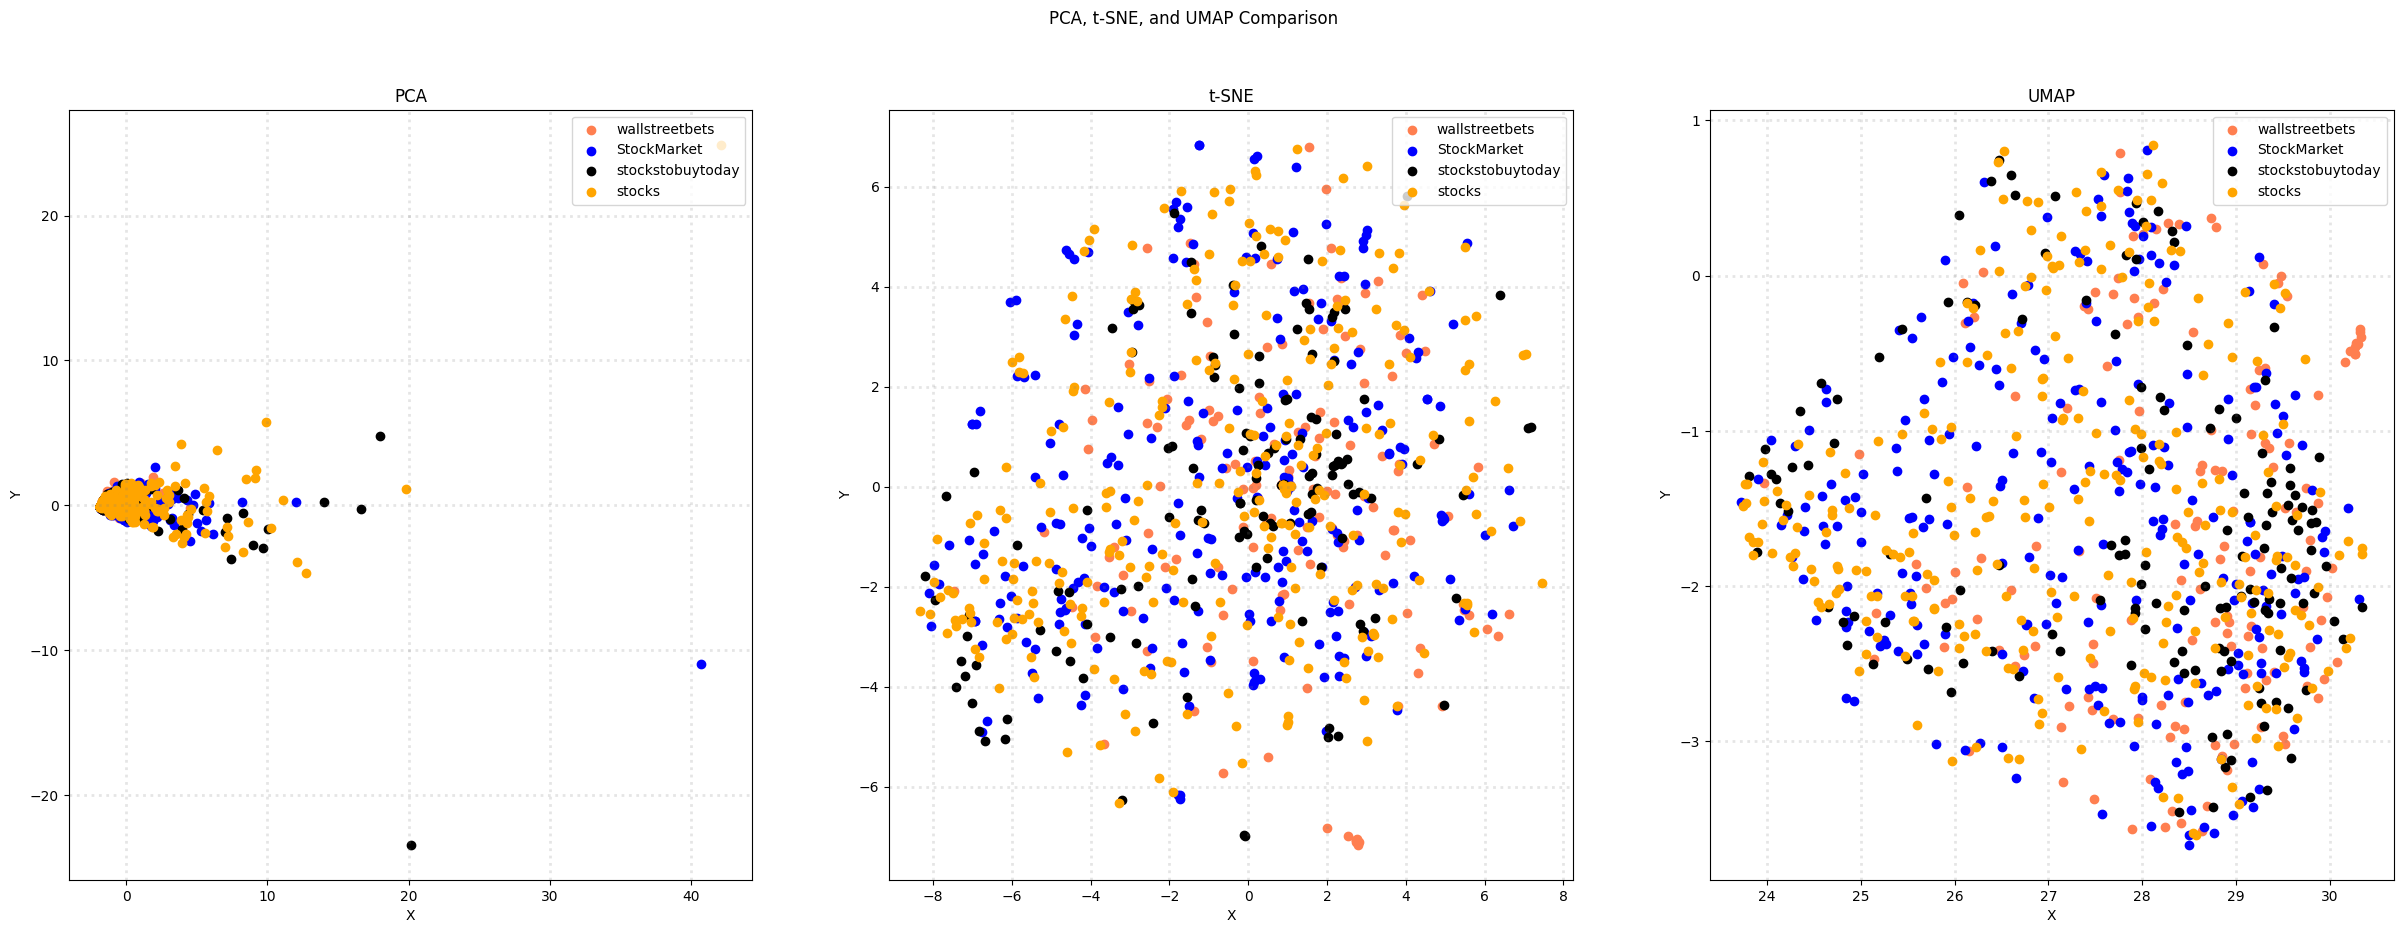

In [76]:
# Apply PCA, t-SNE, and UMAP to the data
reddit_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
reddit_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
reddit_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
colors = ['coral', 'blue', 'black', 'orange']
categories = reddit_df['subreddit'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, reddit_df_reduced, title):
    for c, category in zip(colors, categories):
        xs = reddit_df_reduced[reddit_df['subreddit'] == category].T[0]
        ys = reddit_df_reduced[reddit_df['subreddit'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], reddit_pca_aug, 'PCA')
plot_scatter(axes[1], reddit_tsne_aug, 't-SNE')
plot_scatter(axes[2], reddit_umap_aug, 'UMAP')

plt.show()

---

### >>> Exercise 18:
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

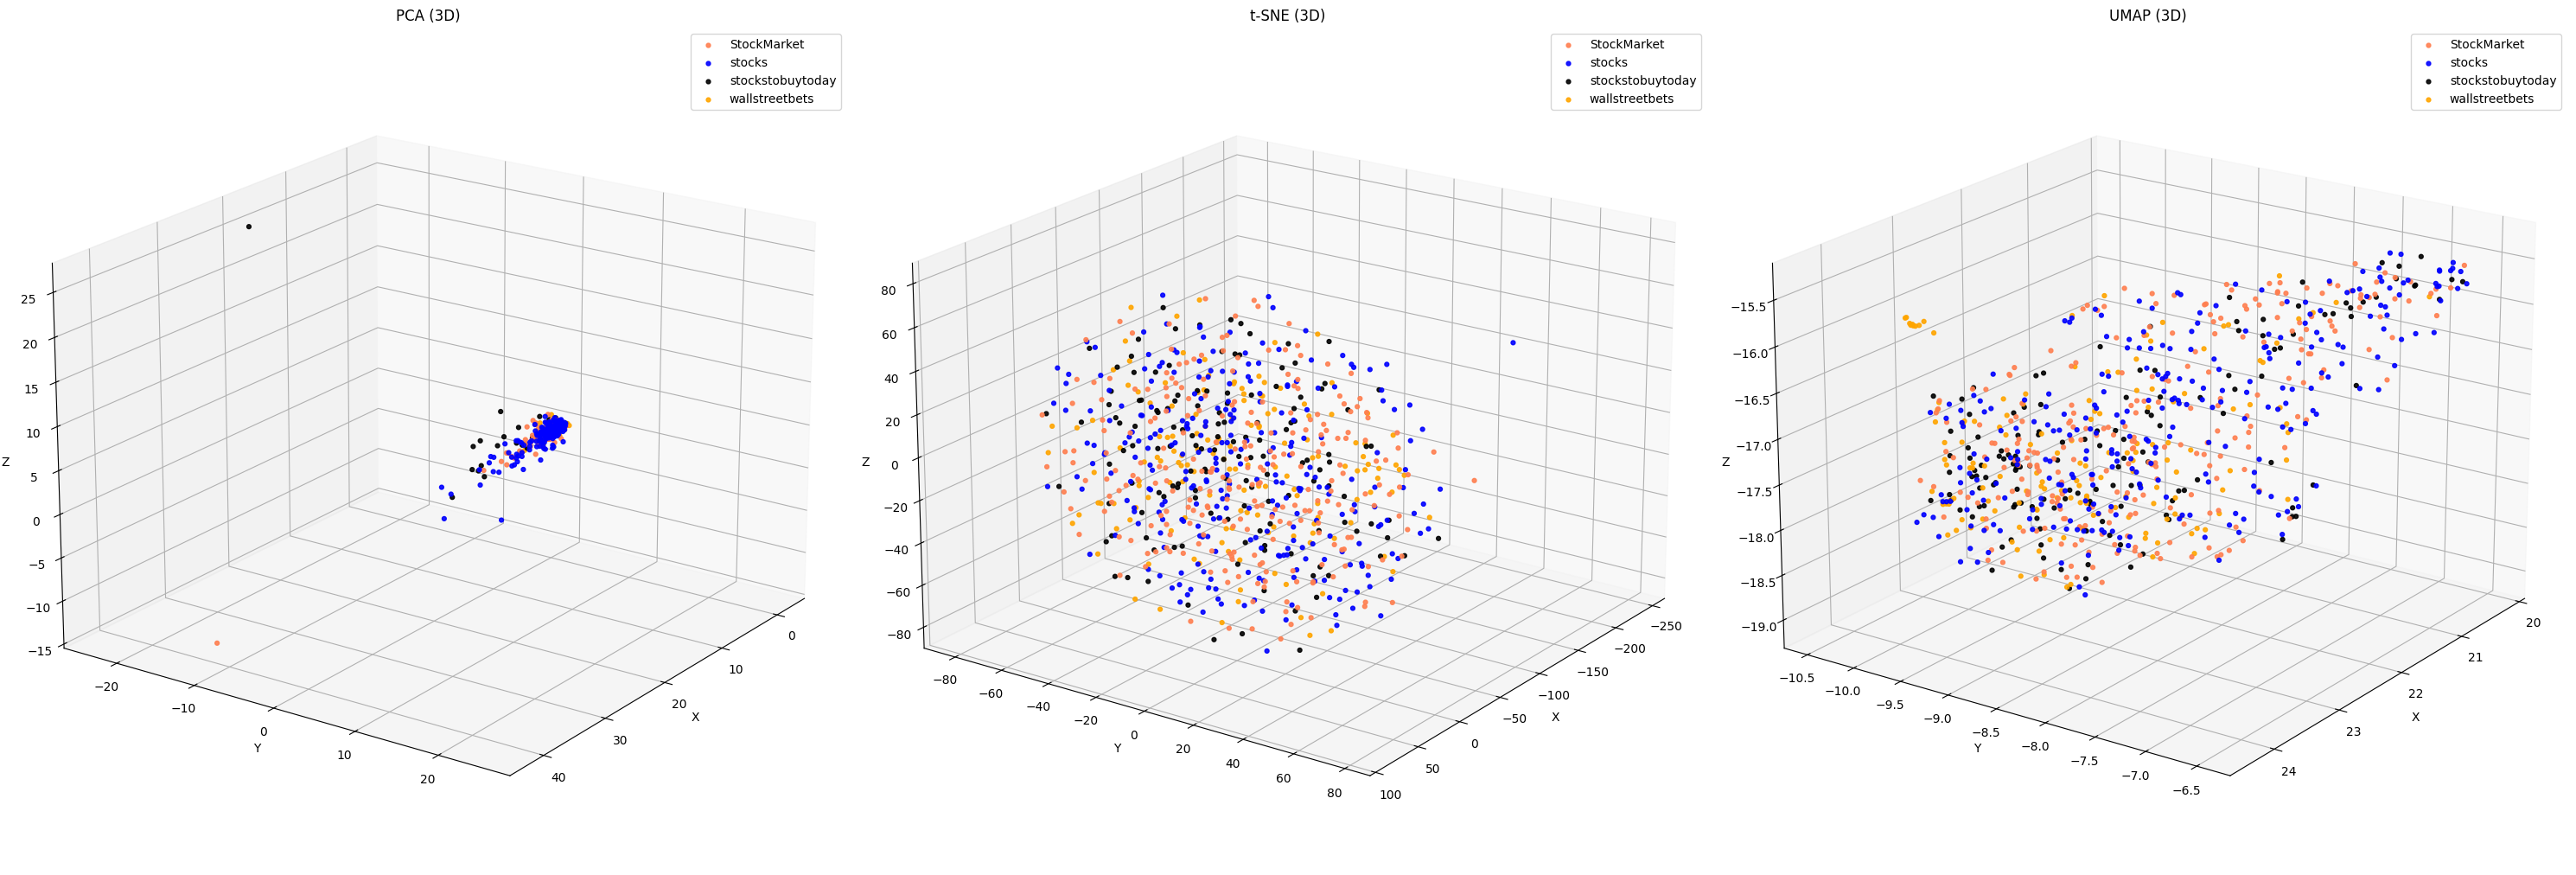

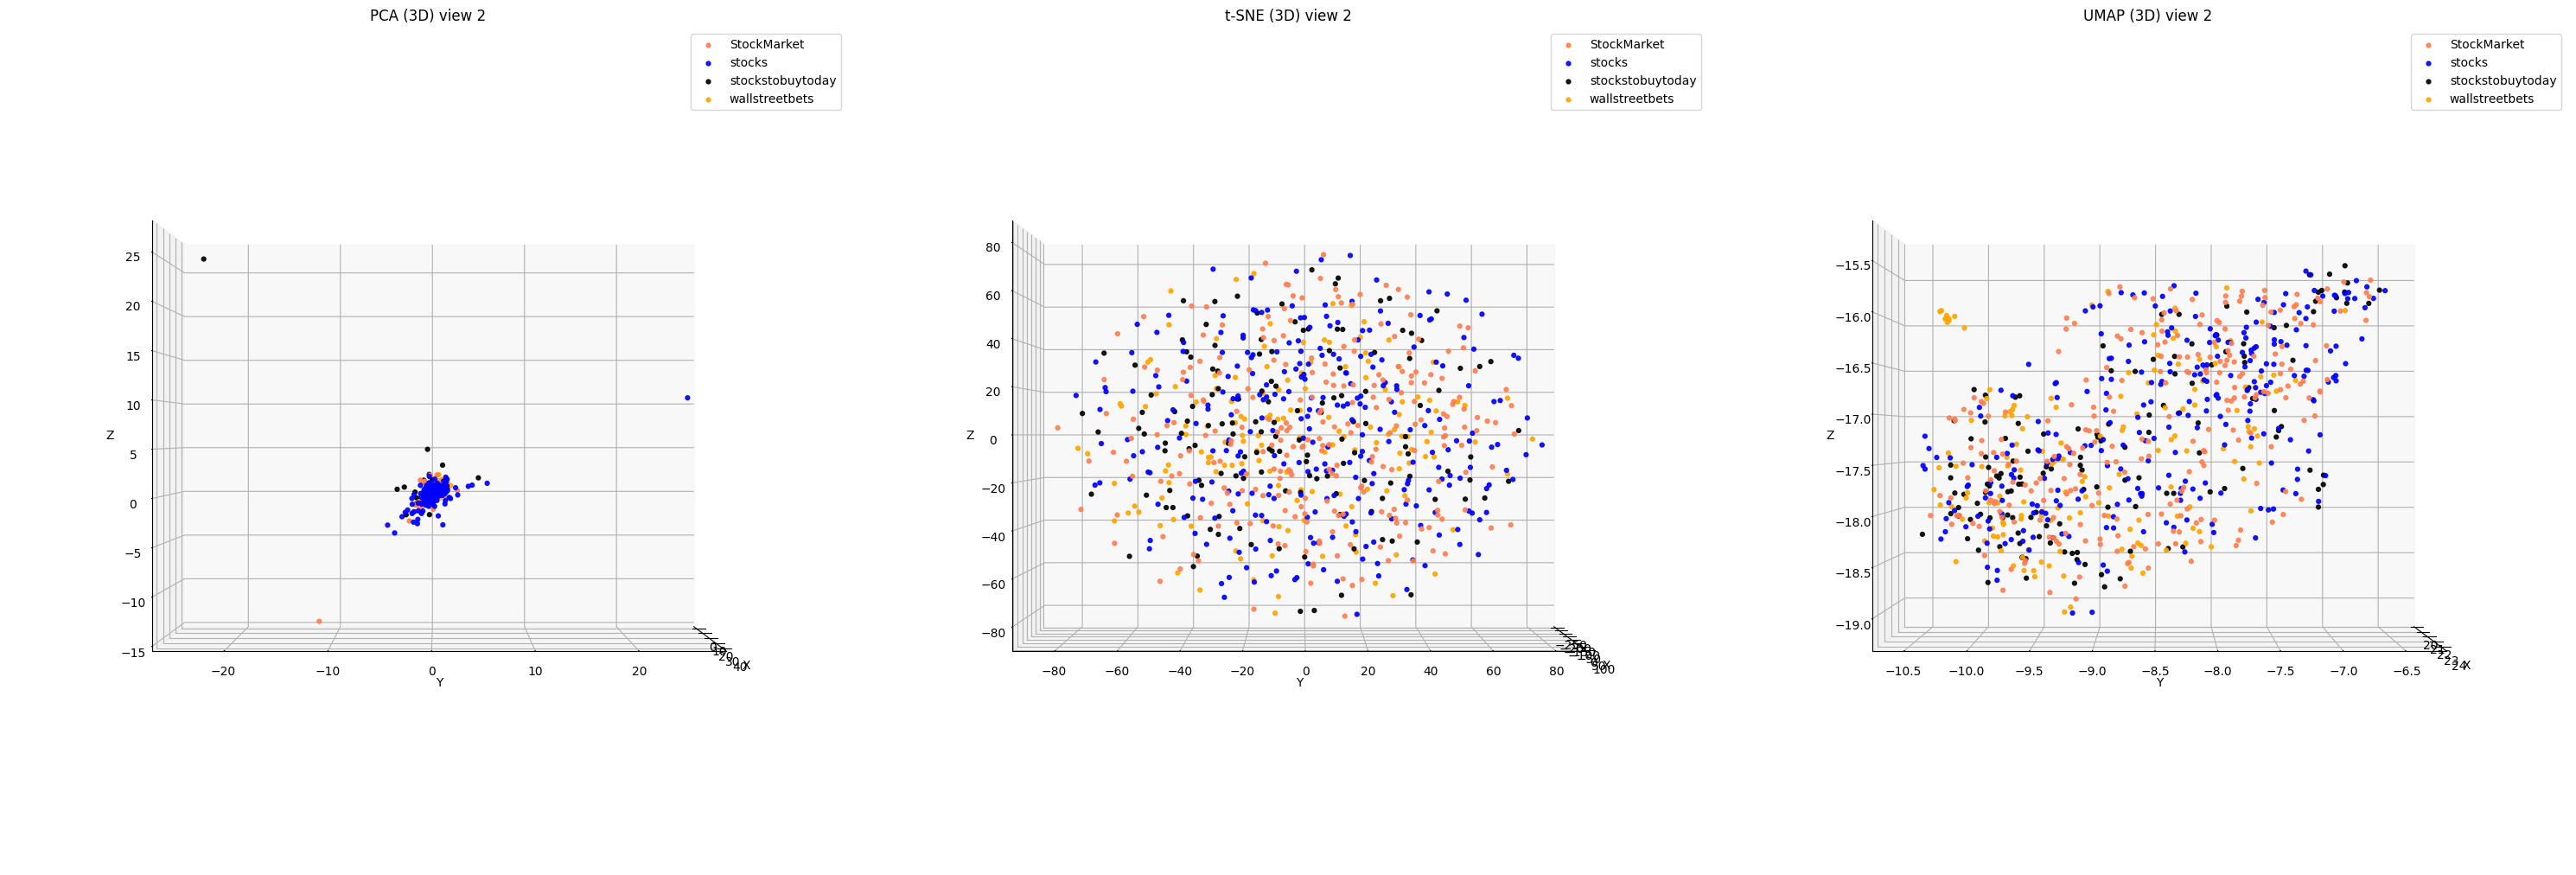

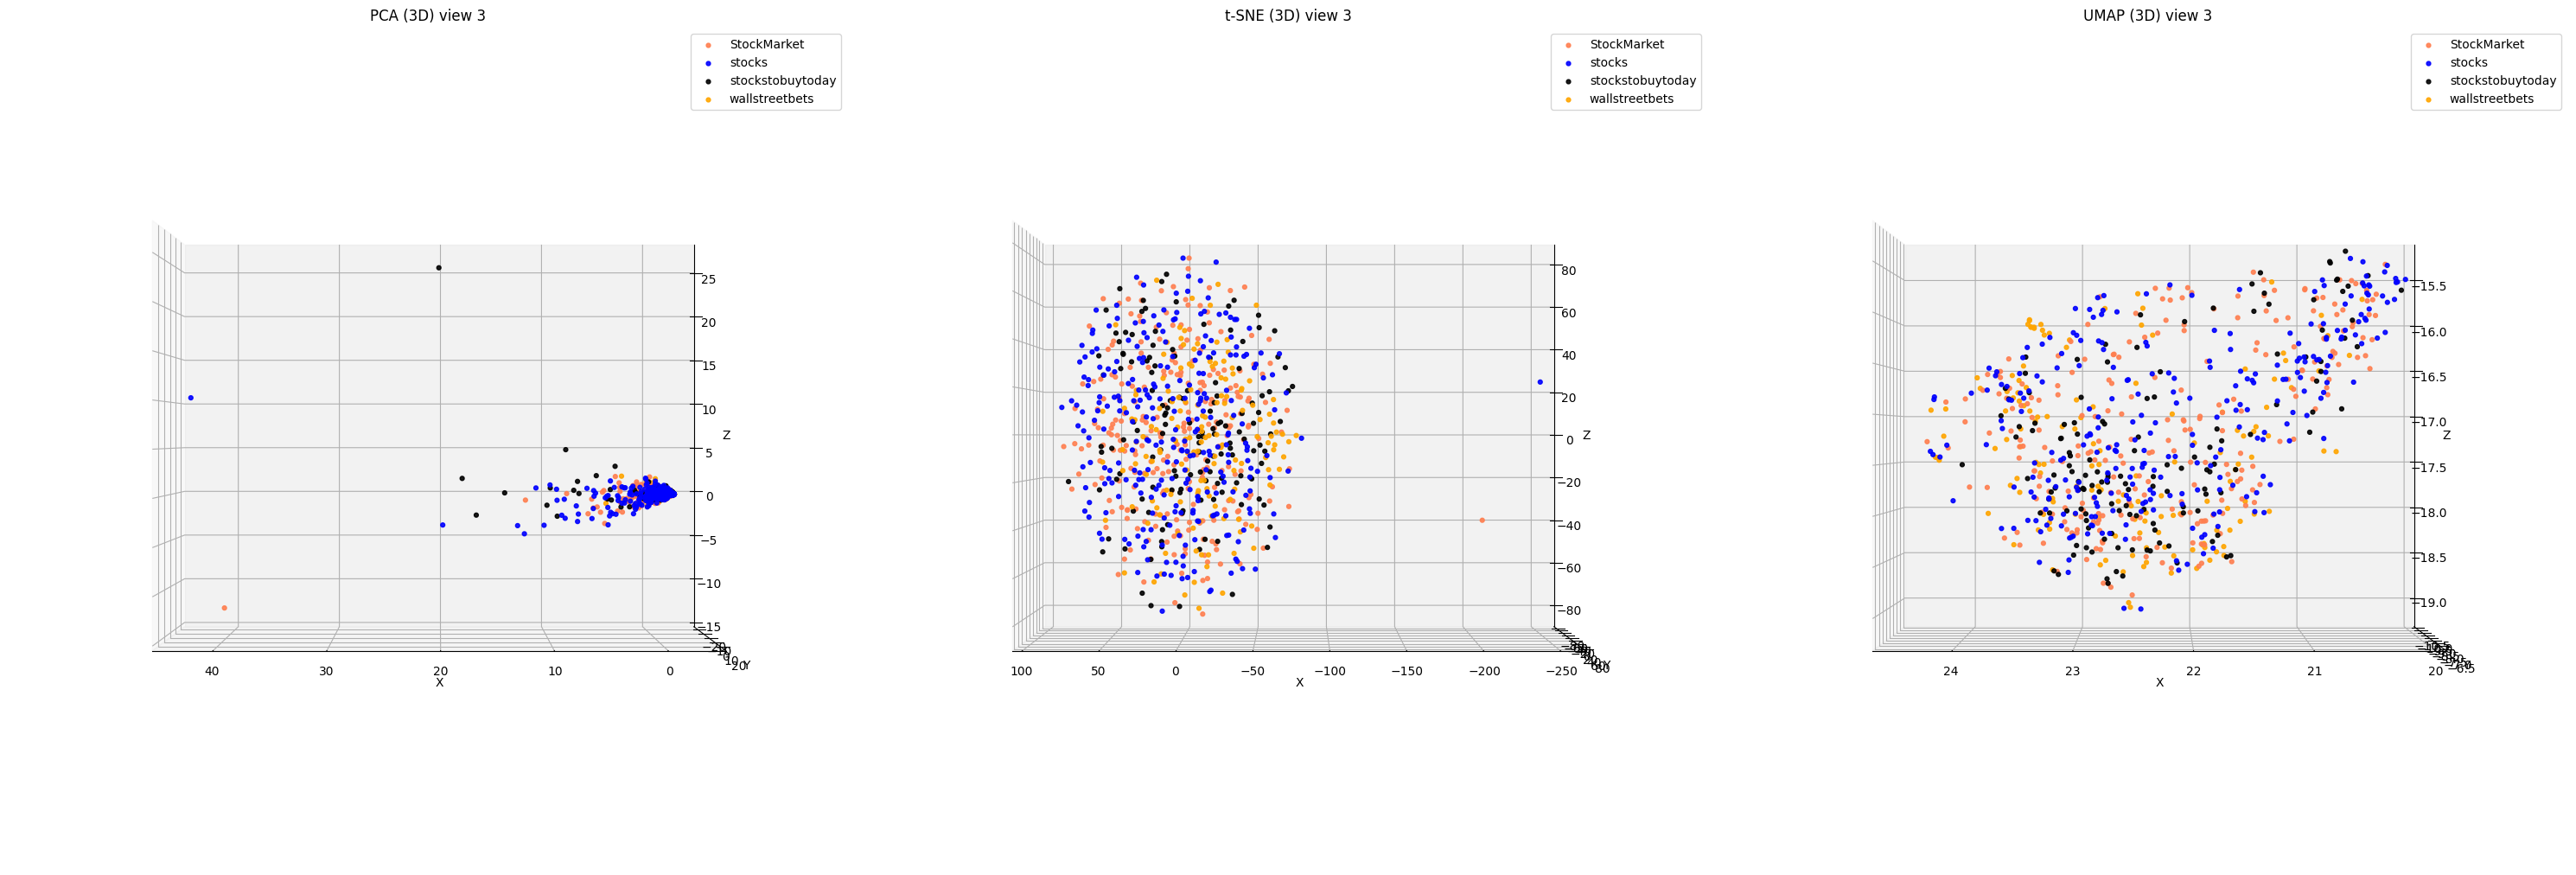

In [77]:
# Answer Here
# From the 3D visualizations, we see that the PCA one is very packed together, while the t-SNE one is quite more scattered.
# The UMAP one has a more distinct shape, and is similar to the previous graph.
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = augmented_df.values

labels = reddit_df['subreddit'].values
categories = np.unique(labels)

colors = ['coral', 'blue', 'black', 'orange']

# Compute 3D embeddings
reddit_pca3  = PCA(n_components=3).fit_transform(data)
reddit_tsne3 = TSNE(n_components=3).fit_transform(data)
reddit_umap3 = umap.UMAP(n_components=3).fit_transform(data)

# 3D plot function
def plot_3d(ax, emb, title, elev, azim):
    for c, cat in zip(colors, categories):
        m = (labels == cat)
        ax.scatter(emb[m,0], emb[m,1], emb[m,2], s=12, alpha=0.9, label=cat, c=c)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# Plot first viewpoint
fig = plt.figure(figsize=(30, 10))
axes = [fig.add_subplot(1,3,i+1, projection='3d') for i in range(3)]

plot_3d(axes[0], reddit_pca3,  'PCA (3D)',  elev=20, azim=35)
plot_3d(axes[1], reddit_tsne3, 't-SNE (3D)', elev=20, azim=35)
plot_3d(axes[2], reddit_umap3, 'UMAP (3D)',  elev=20, azim=35)

plt.tight_layout()
plt.show()

# Second viewpoint
fig2 = plt.figure(figsize=(30, 10))
axes2 = [fig2.add_subplot(1,3,i+1, projection='3d') for i in range(3)]
plot_3d(axes2[0], reddit_pca3,  'PCA (3D) view 2',  elev=0, azim=0)
plot_3d(axes2[1], reddit_tsne3, 't-SNE (3D) view 2', elev=0, azim=0)
plot_3d(axes2[2], reddit_umap3, 'UMAP (3D) view 2',  elev=0, azim=0)
plt.tight_layout()
plt.show()

# Third viewpoint
fig3 = plt.figure(figsize=(30, 10))
axes3 = [fig3.add_subplot(1,3,i+1, projection='3d') for i in range(3)]
plot_3d(axes3[0], reddit_pca3,  'PCA (3D) view 3',  elev=0, azim=90)
plot_3d(axes3[1], reddit_tsne3, 't-SNE (3D) view 3', elev=0, azim=90)
plot_3d(axes3[2], reddit_umap3, 'UMAP (3D) view 3',  elev=0, azim=90)
plt.tight_layout()
plt.show()


---

### 5.6 Discretization and Binarization
Given our current original dataset, we would like to transform one of the attributes, `subreddit`, into four binary attributes (one-hot encoding).

---

### >>> Exercise 19
Try to generate the binarization using the `subreddit` column instead. Does it work?

In [78]:
# Answer here
# Yes, it works. The encoding would differ but you can use string labels instead of numerical ones.

from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
reddit_df['bin_category'] = mlb.fit_transform(reddit_df['subreddit']).tolist()

reddit_df['bin_category'][0:9]

0    [0, 0, 0, 1]
1    [0, 0, 0, 1]
2    [1, 0, 0, 0]
3    [0, 0, 1, 0]
4    [1, 0, 0, 0]
5    [0, 0, 0, 1]
6    [0, 1, 0, 0]
7    [0, 0, 0, 1]
8    [0, 1, 0, 0]
Name: bin_category, dtype: object

---

## 6. Data Exploration

Here we'll take a peek into our data and calculate the cosine similarity between samples.

In [79]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = reddit_df.iloc[1]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reddit_df.iloc[10]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reddit_df.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']
["It's a copy/paste from a Bloomberg terminal."]
["I think it's actually illegal to say how I feel"]


In [80]:
# Here we compare samples with cosine similarity
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1_bin, document_vector_count_2_bin, dense_output=True)[0,0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1_bin, document_vector_count_3_bin, dense_output=True)[0,0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2_bin, document_vector_count_3_bin, dense_output=True)[0,0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1_bin, document_vector_count_1_bin, dense_output=True)[0,0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2_bin, document_vector_count_2_bin, dense_output=True)[0,0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3_bin, document_vector_count_3_bin, dense_output=True)[0,0]

# Print 
print(f"Cosine Similarity using count between 1 and 2: {cos_sim_count_1_2:.4f}")
print(f"Cosine Similarity using count between 1 and 3: {cos_sim_count_1_3:.4f}")
print(f"Cosine Similarity using count between 2 and 3: {cos_sim_count_2_3:.4f}")

print(f"Cosine Similarity using count between 1 and 1: {cos_sim_count_1_1:.4f}")
print(f"Cosine Similarity using count between 2 and 2: {cos_sim_count_2_2:.4f}")
print(f"Cosine Similarity using count between 3 and 3: {cos_sim_count_3_3:.4f}")

Cosine Similarity using count between 1 and 2: 0.0851
Cosine Similarity using count between 1 and 3: 0.0737
Cosine Similarity using count between 2 and 3: 0.1443
Cosine Similarity using count between 1 and 1: 1.0000
Cosine Similarity using count between 2 and 2: 1.0000
Cosine Similarity using count between 3 and 3: 1.0000


---

### >>> Exercise 20:
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [81]:
# Answer
# In the above example, the subreddit labels for the text references are "wallstreetbets", "stocks", and "StockMarket".
# In this example, I changed the references to id=0 (wallstreetbets), id=9 (stockstobuytoday), and id=99 (wallstreetbets).
# The cosine similarity between 1 & 2 and between 1 & 3 are zero because sample 1 is short and don't share any terms with the other two.

from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

document_to_transform_1 = []
random_record_1 = reddit_df.iloc[0]['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reddit_df.iloc[9]['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reddit_df.iloc[99]['text']
document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1_bin, document_vector_count_2_bin, dense_output=True)[0,0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1_bin, document_vector_count_3_bin, dense_output=True)[0,0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2_bin, document_vector_count_3_bin, dense_output=True)[0,0]

# Print 
print(f"Cosine Similarity using count between 1 and 2: {cos_sim_count_1_2}")
print(f"Cosine Similarity using count between 1 and 3: {cos_sim_count_1_3}")
print(f"Cosine Similarity using count between 2 and 3: {cos_sim_count_2_3}")

Cosine Similarity using count between 1 and 2: 0.0
Cosine Similarity using count between 1 and 3: 0.0
Cosine Similarity using count between 2 and 3: 0.2719641466102106


---

## 7. Data Classification
After uncovering patterns, trends, or insights from raw data, classification helps organize and label the data into predefined categories. We will implement a **Multinomial Naive Bayes**. For that we first split our data following a typical 70/30 split for the training and test set.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
order = {'StockMarket': 0, 'stocks': 1, 'stockstobuytoday': 2, 'wallstreetbets': 3}
reddit_df['subreddit_cat'] = (
    reddit_df['subreddit'].map(order).astype('int8')
)
labels = [0, 1, 2, 3]
target_names = ['StockMarket', 'stocks', 'stockstobuytoday', 'wallstreetbets']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_df['subreddit_cat'], test_size=0.3, random_state=42, stratify=reddit_df['subreddit_cat'])

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=labels, target_names=target_names, digits=4))

Accuracy: 0.4713114754098361

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5270    0.5200    0.5235        75
          stocks     0.4167    0.6707    0.5140        82
stockstobuytoday     0.7059    0.2857    0.4068        42
  wallstreetbets     0.4286    0.2000    0.2727        45

        accuracy                         0.4713       244
       macro avg     0.5195    0.4191    0.4293       244
    weighted avg     0.5026    0.4713    0.4540       244



---

### >>> Exercise 21:

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
order = {'StockMarket': 0, 'stocks': 1, 'stockstobuytoday': 2, 'wallstreetbets': 3}
reddit_df['subreddit_cat'] = (
    reddit_df['subreddit'].map(order).astype('int8')
)
labels = [0, 1, 2, 3]
target_names = ['StockMarket', 'stocks', 'stockstobuytoday', 'wallstreetbets']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, reddit_df['subreddit_cat'], test_size=0.3, random_state=42, stratify=reddit_df['subreddit_cat'])

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=labels, target_names=target_names, digits=4))

Accuracy: 0.47950819672131145

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5195    0.5333    0.5263        75
          stocks     0.4274    0.6463    0.5146        82
stockstobuytoday     0.7000    0.3333    0.4516        42
  wallstreetbets     0.4348    0.2222    0.2941        45

        accuracy                         0.4795       244
       macro avg     0.5204    0.4338    0.4467       244
    weighted avg     0.5040    0.4795    0.4667       244



---

### >>> Exercise 22:

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [84]:
# Answer
# The overall accuracy using the augmented TDM is better, though not by much (49.2% vs. 48.0%).
# The macro/weighted F1 score has also improved, yielding 1-3% gain.

---

In the following code, we will train and evaluate a Decision Tree classifier on both the document-term matrix and the augmented data (with patterns), allowing us to compare its performance with the Naive Bayes model.

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_df['subreddit_cat'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.4139344262295082

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4444    0.4156    0.4295        77
          stocks     0.4396    0.4706    0.4545        85
stockstobuytoday     0.3871    0.3333    0.3582        36
  wallstreetbets     0.3400    0.3696    0.3542        46

        accuracy                         0.4139       244
       macro avg     0.4028    0.3973    0.3991       244
    weighted avg     0.4146    0.4139    0.4135       244



---

### >>> Exercise 23:

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [86]:
# Answer
# Multinomial Naive Bayes is great for the data we're dealing with: bag-of-words/text.
# Decision Trees split on one word at a time in a huge, sparse space, so they can overfit and miss lots of small clues.
# So Naive Bayes generalizes better on text and scored higher accuracy/F1 in our examples.

---

### >>> Exercise 24:

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [87]:
# Answer
# The performance is better than that obtained with the original TDM, but still not on par with Naive Bayes.
# It shows that augmented data helps, but using an appropriate model (Naive Bayes) might help you gain even more performance.
# Decision Trees split on one word at a time in a huge, sparse space, so they probably aren't suitable for this kind of data.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, reddit_df['subreddit_cat'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.32786885245901637

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.3733    0.3636    0.3684        77
          stocks     0.3725    0.4471    0.4064        85
stockstobuytoday     0.2000    0.1111    0.1429        36
  wallstreetbets     0.2128    0.2174    0.2151        46

        accuracy                         0.3279       244
       macro avg     0.2897    0.2848    0.2832       244
    weighted avg     0.3172    0.3279    0.3195       244



---

### >>> Exercise 25:

In your opinion, how should one choose the best model for a given task, such as the classification example above?

In [88]:
# Answer
# If we're dealing with bag-of-words features, Multinomial Naive Bayes is more suitable.
# Decision Trees performs best when dealing with structured/tabular data.
# But they are weak for very high-dimensional sparse text, raw images, or sequence data.

---

### >>> Generate TF-IDF Features & Implement NB Classifier:

We will first convert the text into TF-IDF features:

In [89]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = reddit_df['text'].astype(str)
# TF-IDF vectorization
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),   # Unigrams + bigrams
    min_df=2,             # Ignore very rare terms
    max_df=0.95           # Drop extremely common terms
)
X = tfidf.fit_transform(corpus)

Then we can train the Naive Bayes classifier using the TF-IDF features we generated. We choose ComplementNB for this task because it often works better with TF-IDF and class imbalance.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, classification_report

y = reddit_df['subreddit'].astype(str).values

# Train/test split (70/30 with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Train
nb = ComplementNB()
nb.fit(X_train, y_train)

# Evaluation
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
labels_sorted = sorted(np.unique(y))
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=labels_sorted, target_names=labels_sorted, digits=4))



Accuracy: 0.4959016393442623

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4835    0.5867    0.5301        75
          stocks     0.4783    0.5366    0.5057        82
stockstobuytoday     0.6071    0.4048    0.4857        42
  wallstreetbets     0.4848    0.3556    0.4103        45

        accuracy                         0.4959       244
       macro avg     0.5134    0.4709    0.4830       244
    weighted avg     0.5033    0.4959    0.4922       244



We can see that with TF-IDF + ComplementNB, we can get to 50% accuracy & 48% macro F1. Now we'll compare this to a regular word frequency features + MultinomialNB classifier:

In [91]:
# Word frequency features + MultinomialNB

from sklearn.naive_bayes import MultinomialNB

# Vectorization
freq_count = CountVectorizer(min_df=2, max_df=0.95, ngram_range=(1,2), binary=False)
X = freq_count.fit_transform(corpus)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Train
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluation
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
labels_sorted = sorted(np.unique(y))
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=labels_sorted, target_names=labels_sorted, digits=4))


Accuracy: 0.47950819672131145

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5443    0.5733    0.5584        75
          stocks     0.4138    0.5854    0.4848        82
stockstobuytoday     0.5862    0.4048    0.4789        42
  wallstreetbets     0.4500    0.2000    0.2769        45

        accuracy                         0.4795       244
       macro avg     0.4986    0.4409    0.4498       244
    weighted avg     0.4903    0.4795    0.4681       244



As we can see, it performs slightly worse than TF-IDF + ComplementNB. There's still room to improve for TF-IDF + ComplementNB. We'll augment the data with previously mined pattern features and see if the performance improves even more.

In [92]:
from scipy import sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB

corpus = reddit_df['text'].astype(str)
y = reddit_df['subreddit'].astype(str).values
idx = corpus.index

# Split
X_train_txt, X_test_txt, y_train, y_test, idx_train, idx_test = train_test_split(
    corpus, y, idx, test_size=0.30, random_state=42, stratify=y
)

pattern_train = None
pattern_test = None
if 'pattern_matrix' in globals():
    pat_train_df = pattern_matrix.loc[idx_train]
    pat_test_df  = pattern_matrix.loc[idx_test]
    pattern_train = sp.csr_matrix(pat_train_df.values)
    pattern_test  = sp.csr_matrix(pat_test_df.values)
else:
    print("No pattern_matrix found; skipping augmentation.")

# TF-IDF vectorization
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.95)
Xtr = tfidf.fit_transform(X_train_txt)
Xte = tfidf.transform(X_test_txt)

if (pattern_train is not None) and (pattern_test is not None):
    Xtr_aug = sp.hstack([Xtr, pattern_train], format='csr')
    Xte_aug = sp.hstack([Xte, pattern_test],  format='csr')
    clf_aug = ComplementNB()
    clf_aug.fit(Xtr_aug, y_train) # Train
    y_pred_aug = clf_aug.predict(Xte_aug) # Evaluation
    acc_aug = accuracy_score(y_test, y_pred_aug)
    print("Accuracy:", acc_aug)
    labels_sorted = sorted(np.unique(y))
    print("\nClassification Report:\n", classification_report(y_test, y_pred_aug, labels=labels_sorted, target_names=labels_sorted, digits=4))


Accuracy: 0.5573770491803278

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5181    0.5733    0.5443        75
          stocks     0.5729    0.6707    0.6180        82
stockstobuytoday     0.6452    0.4762    0.5479        42
  wallstreetbets     0.5294    0.4000    0.4557        45

        accuracy                         0.5574       244
       macro avg     0.5664    0.5301    0.5415       244
    weighted avg     0.5605    0.5574    0.5533       244



With the augmentation, accuracy rises to 55.7% and macro-F1 to 54.1%. It seems like augmenting the training data significantly improves model performance, and the gains appear consistent across models.

### >>> Inefficiencies Noticed & Improvements:
With Reddit stock sentiment data (short, noisy social text with cashtags/emojis), there are often tick symbols like `$TSLA`, but with naive preprocessing (lowercasing + punctuation stripping) it becomes `tsla`. Also, URLs, mentions, and hashtags can also be handled bluntly with this approach. Perhaps we can strip URLs entirely or keep hashtags as tokens.

One thing I also noticed is that our Reddit dataset is small and each post/comment is short. After some more data cleaning, the analysis become inefficient because they 
- throw away more of the already-scarce signal
- create a very sparse vocabulary where most features appear once
- make metrics high-variance under random splits.

Perhaps by improving the data preprocessing pipeline, we can preserve more tokens for analysis (like emojis). By tweaking the tokening process or adjusting the filtering parameters, a bit less signal would be lost.